In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

* Using `for-loop` to load all *.txt files

In [2]:
digits_list = []

for i in range(1797):
    address = './Images/im{}.txt'.format(i)
    A = np.loadtxt(address, delimiter=',')
    digits_list.append(A.flatten())

y = np.loadtxt("./im_target.txt", delimiter=',')

In [3]:
A = np.array(digits_list)
A.shape

(1797, 64)

In [4]:
print(y)

[0. 1. 2. ... 8. 9. 8.]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(A, y, test_size=0.3, stratify=y, random_state=12)

In [6]:
X_train.shape

(1257, 64)

In [7]:
print( sum(y_train==1) / len(y_train) )
print( sum(y_train==3) / len(y_train) )
print( sum(y_train==5) / len(y_train) )

0.10103420843277645
0.10182975338106603
0.10103420843277645


In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

In [9]:
param_range = [.001,.01,.1,1,10,100]
train_scores, test_scores = validation_curve(SVC(kernel='rbf', gamma='scale'), X_train,y_train, 
                                             param_name="C",
                                             param_range=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                                             cv=10
                                            )

## Explain
* each row has 5 elements. The train_scores has 6 rows:
    * in each parameter of `C`, there have 5 comparison to compare

In [10]:
train_scores

array([[0.2979664 , 0.2979664 , 0.29531388, 0.20247569, 0.20159151,
        0.1025641 , 0.1025641 , 0.19787986, 0.19876325, 0.29681979],
       [0.2979664 , 0.2979664 , 0.29531388, 0.20247569, 0.20159151,
        0.10698497, 0.11405836, 0.19787986, 0.19876325, 0.29681979],
       [0.95313882, 0.94783378, 0.95137047, 0.95402299, 0.95490716,
        0.95755968, 0.95402299, 0.95583039, 0.954947  , 0.95848057],
       [0.99381079, 0.99557913, 0.99469496, 0.99469496, 0.99557913,
        0.99646331, 0.99557913, 0.99469965, 0.99558304, 0.99469965],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ]])

In [11]:
test_scores

array([[0.28571429, 0.29365079, 0.28571429, 0.19047619, 0.1984127 ,
        0.0952381 , 0.0952381 , 0.192     , 0.192     , 0.296     ],
       [0.28571429, 0.29365079, 0.28571429, 0.19047619, 0.1984127 ,
        0.0952381 , 0.0952381 , 0.192     , 0.192     , 0.296     ],
       [0.93650794, 0.96825397, 0.96825397, 0.92857143, 0.96031746,
        0.92857143, 0.93650794, 0.944     , 0.944     , 0.944     ],
       [0.99206349, 1.        , 0.97619048, 0.98412698, 0.99206349,
        0.98412698, 0.98412698, 0.984     , 0.968     , 0.984     ],
       [0.99206349, 1.        , 0.99206349, 1.        , 1.        ,
        0.98412698, 0.98412698, 0.984     , 0.984     , 0.976     ],
       [0.99206349, 1.        , 0.99206349, 1.        , 1.        ,
        0.98412698, 0.98412698, 0.984     , 0.984     , 0.976     ]])

In [11]:
from sklearn.linear_model import LogisticRegression

In [14]:
train_mean

array([0.2193905 , 0.22098201, 0.95421138, 0.99513837, 1.        ,
       1.        ])

In [12]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

Text(0, 0.5, 'Accuracy')

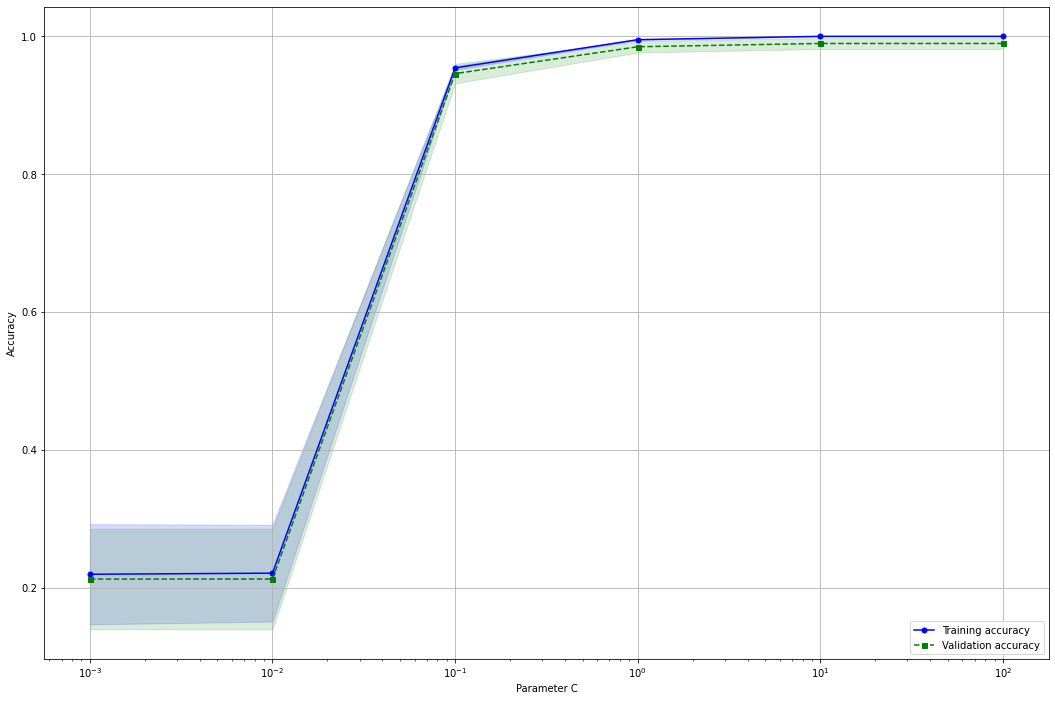

In [13]:
plt.figure(figsize=(18,12))
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()

plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')

In [14]:
np.linspace(0.1, 1, 10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

## how does the model perform with more data?

In [15]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel='rbf', gamma='scale'),
                              X=X_train,
                              y=y_train,
                              train_sizes=np.linspace(0.1, 1.0, 10),
                              cv=5)

In [16]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

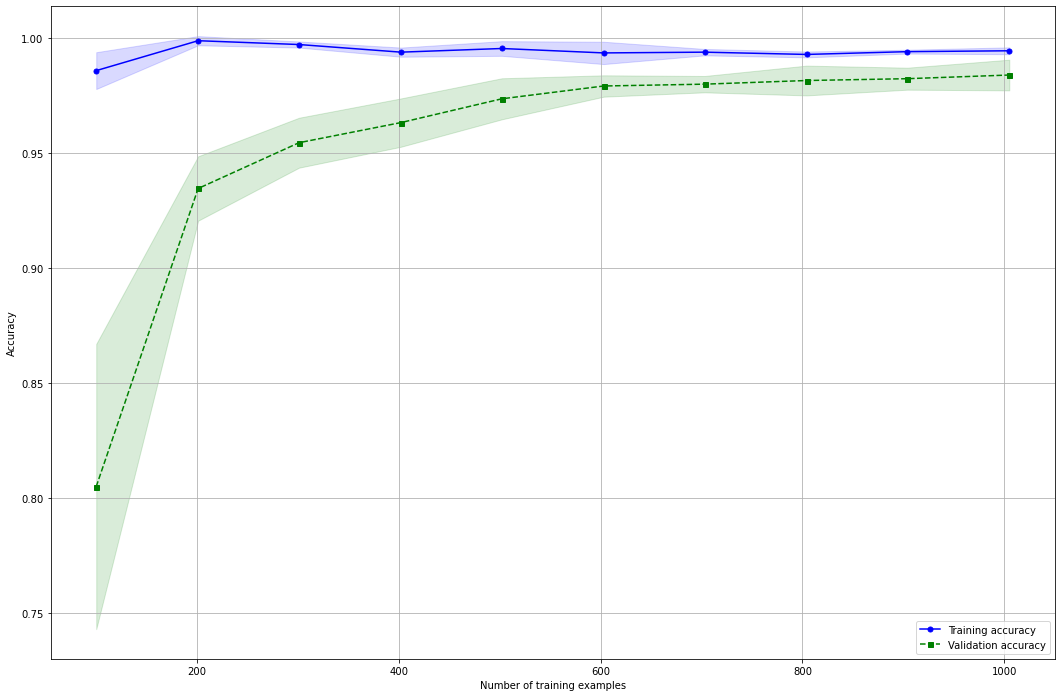

In [17]:
plt.figure(figsize=(18,12))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')